In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator
from sympy import *
from sympy.solvers.ode.systems import dsolve_system
import sympy.physics.mechanics as mech
mech.init_vprinting()
#from sympy.physics.quantum.dagger import Dagger
#init_printing(use_latex='mathjax')

Vamos como ilustração escrever a Lagrangiana para uma partícula de massa $m$ livre no campo gravitacional terrestre

In [3]:
t = symbols('t', real=True)
m_1, m_2, k, e_0, l_0 = symbols('m_1 m_2 k e_0 l_0', positive=True)
q_1, q_2 = symbols('q_1 q_2')

x_1 = Function('x_1')(t)
x_2 = Function('x_2')(t)

A energia cinética é 
$$ T = \frac{1}{2} m_1 \dot{x}_1^2 + \frac{1}{2} m_2 \dot{x}_2^2 $$
que fica definida como

In [4]:
T= Rational(1,2)*m_1*x_1.diff(t)**2 + Rational(1,2)*m_2*x_2.diff(t)**2
display(T)

E a energia potencial tem contribuição da mola e da interação elétrica
$$ U = \frac{k}{2}(x_1 - x_2)^2 + \frac{q_1q_2}{4 \pi e_0 \sqrt{(x_1 - x_2)^2}} $$

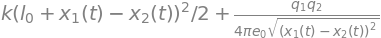

In [5]:
U = Rational(1,2)*k*(x_1 - x_2 + l_0)**2 + (q_1*q_2)/(4*pi*e_0*sqrt((x_1 - x_2)**2))
display(U)

A lagrangiana do systema fica escrita então:

In [11]:
L = (T - U).subs(q_1,0).subs(l_0,0)
display(L)

Temos então que encontrar a equação de Euler-Lagrange para cada uma das variáveis $x_1$ e $x_2$,

$$ \frac{\partial L}{ \partial q} - \frac{d}{dt} \left( \frac{\partial L}{ \partial \dot{q}} \right) = 0 $$
$q=x_1, x_2$

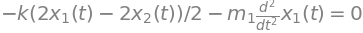

In [12]:
Elx1 = Eq(L.diff(x_1) - L.diff(x_1.diff(t)).diff(t),0)
display(Elx1)

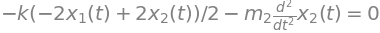

In [13]:
Elx2 = Eq(L.diff(x_2) - L.diff(x_2.diff(t)).diff(t),0)
display(Elx2)

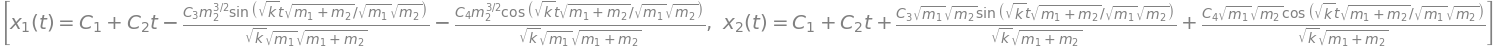

In [15]:
dsolve([Elx1,Elx2])